In [1]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
#load the file 
fuel_data_to_load = "Fuel_data.csv"
df=pd.read_csv(fuel_data_to_load)
df.primary_fuel.unique()
groupd_df = df.groupby(['State','primary_fuel' ]).capacity_mw.agg(['sum'])
groupd_df.to_csv("fuel_out_grouped.csv")

df2=pd.read_csv("fuel_out_grouped.csv")
df2.head()

,State,primary_fuel,sum
0,AK,Coal,196.4
1,AK,Gas,1358.2
2,AK,Hydro,469.0
3,AK,Oil,641.9
4,AK,Storage,45.0


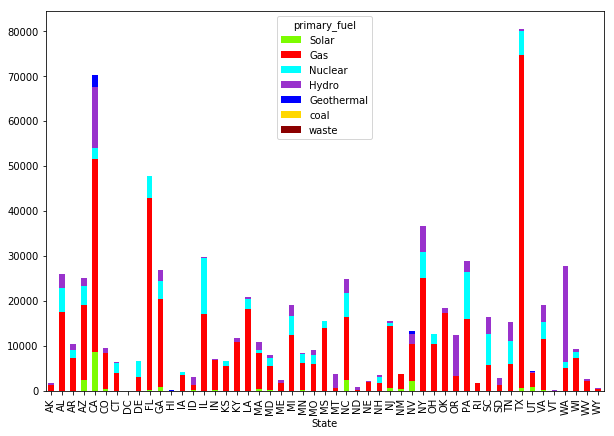

In [3]:
pivot_df = df2.pivot(index='State', columns='primary_fuel', values='sum')
pivot_df = pivot_df.fillna(0)
pivot_df

colors = ["lawngreen", "red", "aqua", "darkorchid", "blue", "gold", "darkred"]

pivot_df.loc[:,['Solar','Gas', 'Nuclear', 'Hydro', 'Geothermal', 
                'coal', 'waste']].plot.bar(stacked=True, tick_label="Capacity MW", 
                                           color=colors, figsize=(10,7))



In [48]:
#df.groupby(['State','primary_fuel'],sort=True).sum()

# final_df = pd.DataFrame
# try:
#     final_df = final_df.groupby(['State', 'primary_fuel']).capacity_mw.agg(['sum'])
# except:
#     print("Error")
    
# final_df.head(10)


In [8]:
# N = 7
# ind = np.arange(N)    # the x locations for the groups
# width = 0.35       # the width of the bars: can also be len(x) sequence

final_df[['State', 'primary_fuel']]
# p1 = plt.bar(ind, df['State'], width)
# p2 = plt.bar(ind, df['primary_fuel'], width, bottom=df['State'])


# plt.show()

TypeError: 'type' object is not subscriptable

In [15]:
#read the second file 
# load file 
read = "State Electricity Profiles3.csv"

#read file  and replace header and drop some columns and rows

df2=pd.read_csv(read,header =2).dropna()
# df2.drop(df2.columns[[1,3]], axis=1, inplace=True)

df2.head()

,Name,Average retail price (cents/MWh),Net summer capacity (MW),Net generation (MWh),Total retail sales (MWh)
0,.Alabama,0.00983,29725,139964250,86241730
1,.Alaska,0.01910,2749,6497466,6185799
2,.Arizona,0.01064,28595,105851721,77646262
3,.Arkansas,0.00826,14642,60775298,46085951
4,.California,0.01606,76414,206146392,257267937


In [16]:
#merge both table 
Energy_df=pd.merge(df,df2,on = "Name",how = "outer")
Energy_df.head()

,Name,Estimate Pop 2016,Estimate Pop 2017,Average retail price (cents/MWh),Net summer capacity (MW),Net generation (MWh),Total retail sales (MWh)
0,.Alabama,4860545.0,4874747.0,0.00983,29725,139964250,86241730
1,.Alaska,741522.0,739795.0,0.01910,2749,6497466,6185799
2,.Arizona,6908642.0,7016270.0,0.01064,28595,105851721,77646262
3,.Arkansas,2988231.0,3004279.0,0.00826,14642,60775298,46085951
4,.California,39296476.0,39536653.0,0.01606,76414,206146392,257267937


In [17]:
Energy_df.dtypes

Name                                 object
Estimate Pop 2016                   float64
Estimate Pop 2017                   float64
Average retail price (cents/MWh)    float64
Net summer capacity (MW)              int64
Net generation (MWh)                  int64
Total retail sales (MWh)              int64
dtype: object

In [18]:
# convert to MW
#Energy_df["Average retail price (cents/kWh)"]*0.001


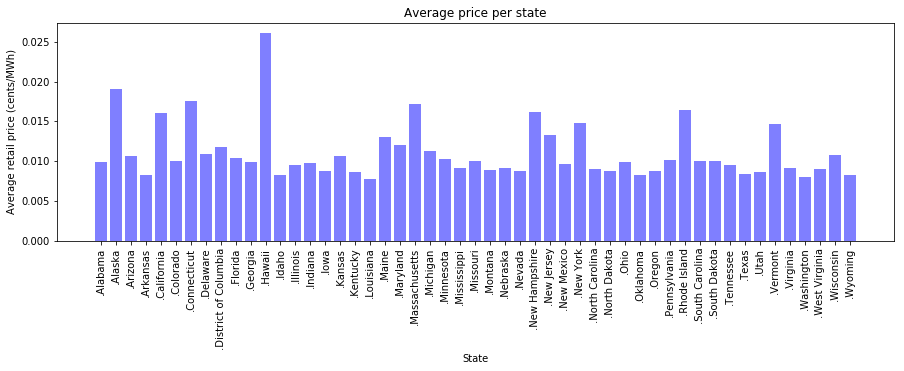

In [19]:
# create a plot to compare average retail price per state 
x_axis = np.arange(len(Energy_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(15,4))
plt.bar(x_axis, Energy_df["Average retail price (cents/MWh)"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, Energy_df["Name"], rotation="vertical")

#set plot legend

plt.title("Average price per state")
plt.xlabel("State")
plt.ylabel("Average retail price (cents/MWh)")

#show the plot
plt.show()

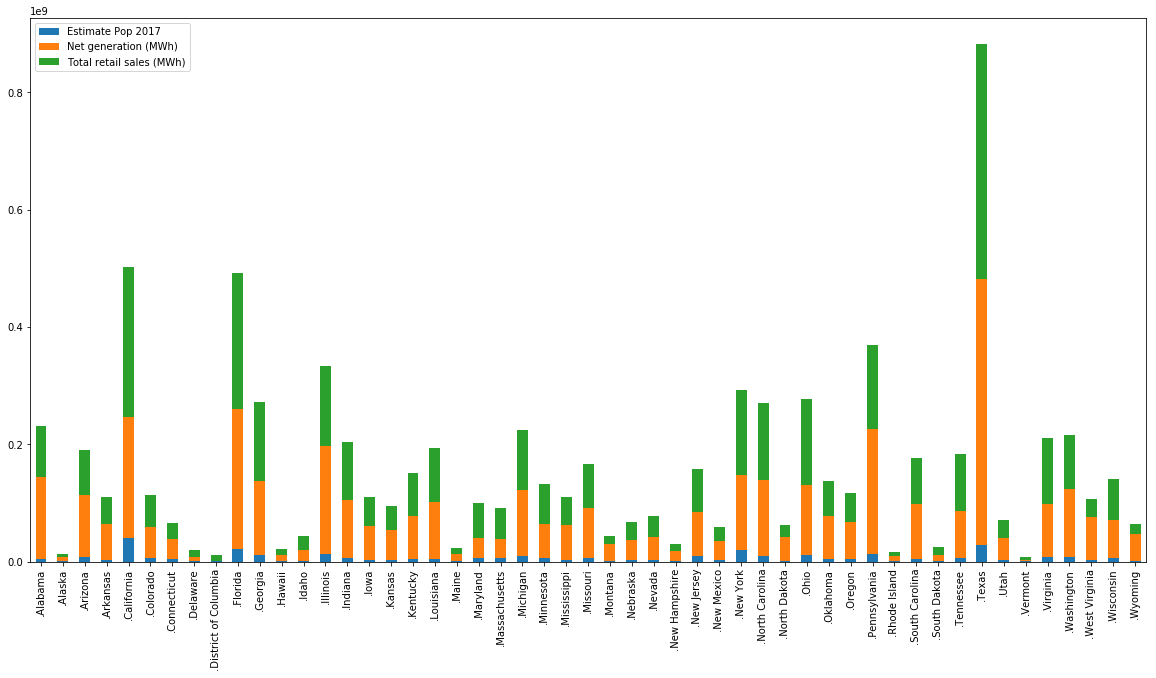

In [38]:
#1 draft or the 2nd both show generation have nothing to do with the pop
multi_plot = Energy_df.plot(y=["Estimate Pop 2017","Net generation (MWh)",
                               "Total retail sales (MWh)"],kind="bar",stacked=True, figsize=(20,10))

multi_plot.set_xticklabels(Energy_df["Name"])

plt.show()


In [65]:
Energy_df['Name'].replace({".Maine":"Northeast", ".New Hampshire":"Northeast", ".Vermont":"Northeast",
                           ".Massachusetts":"Northeast", ".Rhode Island":"Northeast",".Connecticut":"Northeast",
                           ".New York":"Northeast", ".New Jersey":"Northeast",".Pennsylvania":"Northeast",
                           
                           ".Ohio":"Midwest",".Michigan":"Midwest", ".Indiana":"Midwest",".Wisconsin":"Midwest",
                           ".Illinois":"Midwest", ".Minnesota":"Midwest", ".Iowa":"Midwest",".Missouri":"Midwest", 
                           ".North Dakota":"Midwest", ".South Dakota":"Midwest", ".Nebraska":"Midwest",".Kansas":"Midwest",

                           ".Delaware":"South", ".Maryland":"South",".Virginia":"South", ".West Virginia":"South",
                           ".Kentucky":"South",".North Carolina":"South",".South Carolina":"South",".Tennessee":"South",
                           ".Georgia":"South",".Florida":"South",".Alabama":"South",".Mississippi":"South",".Arkansas":"South",
                           ".Louisiana":"South",".Texas":"South",".Oklahoma":"South",".District of Columbia":"South",
                           
                           ".Montana":"West",".Idaho":"West",".Wyoming":"West",".Colorado":"West",
                           ".New Mexico":"West",".Arizona":"West",".Utah":"West",".Nevada":"West",
                           ".California":"West",".Oregon":"West",".Washington":"West",".Alaska":"West",".Hawaii":"West"
                            },inplace = True)

Energy_df.head()


,Name,Estimate Pop 2016,Estimate Pop 2017,Average retail price (cents/MWh),Net summer capacity (MW),Net generation (MWh),Total retail sales (MWh)
0,South,4860545.0,4874747.0,0.00983,29725,139964250,86241730
1,West,741522.0,739795.0,0.01910,2749,6497466,6185799
2,West,6908642.0,7016270.0,0.01064,28595,105851721,77646262
3,South,2988231.0,3004279.0,0.00826,14642,60775298,46085951
4,West,39296476.0,39536653.0,0.01606,76414,206146392,257267937


In [64]:
E=((Energy_df.groupby("Name")).get_group("South").sum(),
   (Energy_df.groupby("Name")).get_group("West").sum(),
   (Energy_df.groupby("Name")).get_group("Midwest").sum(),
   (Energy_df.groupby("Name")).get_group("Northeast").sum())
 

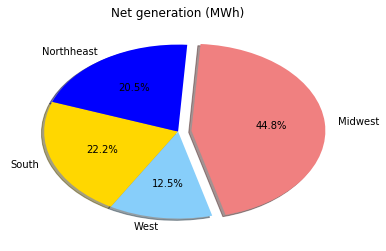

In [67]:
Average_by_region = Energy_df.groupby(['Name'])
generation_sum = Average_by_region['Net summer capacity (MW)'].sum()
generation_sum
# Build Pie Chart
labels = ["South","West","Midwest","Northheast"]
explode = (0, 0, 0.1,0)
colors = ["gold", "lightskyblue", "lightcoral","blue"]
#plot pie 
plt.pie(generation_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",
        shadow=True, startangle=160)
plt.title("Net generation (MWh)")
# Show Figure
plt.show()
